In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/customer_churn_dataset-testing-master.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [ ]:
def fun_gender(value):
  if value=='Male':
    return 1
  else:
    return 0
def fun_st(value):
  if value=='Premium':
    return 2
  elif value=='Standard':
    return 1
  else:
    return 0
def fun_cl(value):
  if value=='Annual':
    return 2
  elif value=='Monthly':
    return 1
  else:
    return 0
df['Gender']=df['Gender'].apply(fun_gender)
df['Subscription Type']=df['Subscription Type'].apply(fun_st)
df['Contract Length']=df['Contract Length'].apply(fun_cl)

In [ ]:
x=df
y=df['Churn']
x=x.drop('Churn',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size = 0.8)
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_scaled_test = scaler_test.transform(X_test)

In [ ]:
regr = LogisticRegression()
regr.fit(X_scaled, y_train)
print(regr.score(X_scaled_test, y_test))
y_pred = regr.predict(X_scaled_test)

0.8657087378640776


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

(0.8656990536092642, 0.8657087378640776, 0.8657034717703284, None)


array([[5933,  860],
       [ 869, 5213]])

<Axes: xlabel='Total Spend'>

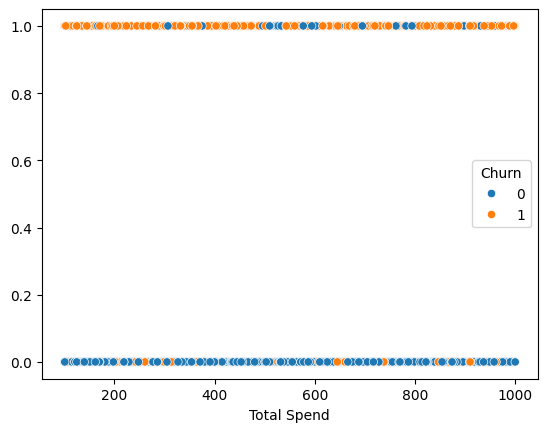

In [ ]:
sns.scatterplot(x=X_test['Total Spend'],y=y_pred,hue=y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_scaled, y_train)
y_pred=knn.predict(X_scaled_test)
print(knn.score(X_scaled_test,y_test))

0.9311067961165048


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

(0.9310984940677627, 0.9311067961165048, 0.9310991238927591, None)


array([[6362,  431],
       [ 456, 5626]])

<Axes: xlabel='Total Spend'>

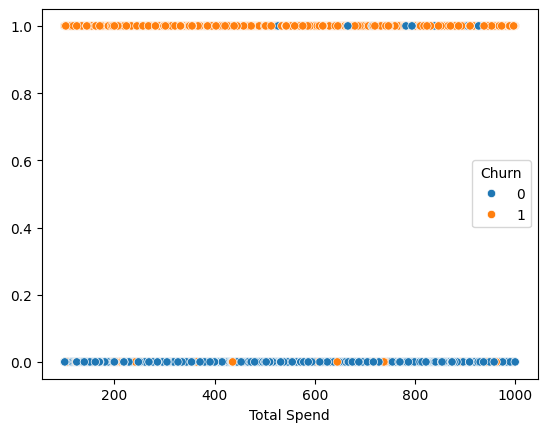

In [ ]:
sns.scatterplot(x=X_test['Total Spend'],y=y_pred,hue=y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, random_state=0)
rf.fit(X_scaled,y_train)
print(rf.score(X_scaled_test,y_test))
y_pred=rf.predict(X_scaled_test)

0.9964271844660194


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

(0.9964491117297768, 0.9964271844660194, 0.9964264659908783, None)


array([[6792,    1],
       [  45, 6037]])

<Axes: xlabel='Total Spend'>

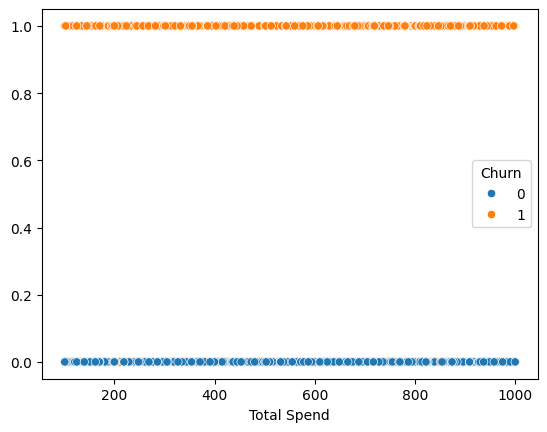

In [ ]:
sns.scatterplot(x=X_test['Total Spend'],y=y_pred,hue=y_test)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf")
svm.fit(X_scaled,y_train)
print(svm.score(X_scaled_test,y_test))
y_pred=svm.predict(X_scaled_test)

0.9591456310679611


In [ ]:
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

(0.9591440029512704, 0.9591456310679611, 0.9591408929019972, None)


array([[6543,  250],
       [ 276, 5806]])

<Axes: xlabel='Total Spend'>

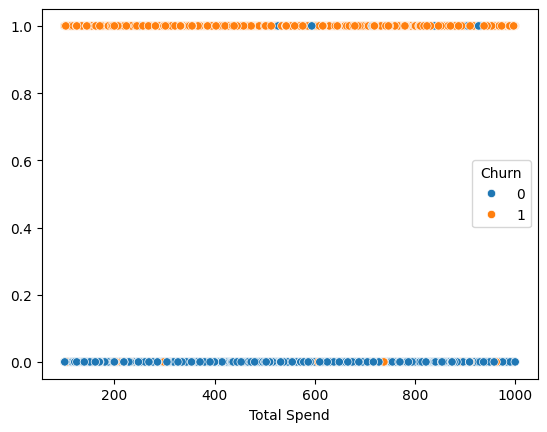

In [ ]:
sns.scatterplot(x=X_test['Total Spend'],y=y_pred,hue=y_test)